# 01 集成学习

Voting Classifier in scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

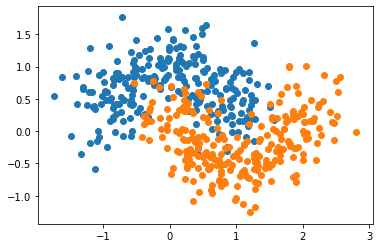

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.824

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.88

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.808

In [8]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

In [9]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

In [10]:
y_predict[:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.88

## 使用 Voting Classifier

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

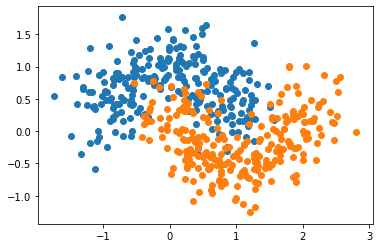

In [14]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

## Hard Voting Claassifier

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))
],voting='hard')


In [17]:
voting_clf.fit(X_train,y_train)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('log_clf',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm_clf',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_f...
                             ('dt_clf',
                              DecisionTreeClassifier(class_weight=None

In [18]:
voting_clf.score(X_test, y_test)

0.888

# 02 Soft Voting Classifier

In [19]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier(random_state=666))
],voting='soft')

In [20]:
voting_clf2.fit(X_train,y_train)
voting_clf2.score(X_test,y_test)

/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/doublc.qluv/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.856

# 03 Bagging & Pasting

从投票的角度来看，现有的机器学习方法数量不够。

`方法`：创建更多的子模型！集成更多的子模型的意见。

`PS.`子模型之间不能一致！子模型之间要有差异性

如何创建差异性？
每个子模型只看样本数据的一部分。

`取样`：放回取样与不放回去取样
- 放回取样：Bagging ·更常用·
- 不放回取样：Pasting

在统计学中，放回取样：bootstrap

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

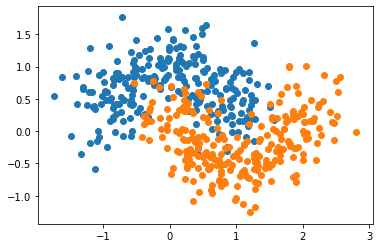

In [24]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

## Bagging

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True)

In [27]:
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test,y_test)

0.872

In [28]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=5000, max_samples=100,
                               bootstrap=True)
bagging_clf2.fit(X_train, y_train)
bagging_clf2.score(X_test,y_test)

0.872

# 04 oob(Out-of-Bag)

放回取样导致一部分样本很有可能没有取到

平均大约有37%的样本没有被取到

不使用测试数据集，而使用这部分没有取到的样本做测试/验证。

obb_score_

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [30]:
bagging_clf.oob_score_

0.928

Bagging的思路极易并行化处理

### n_jobs

In [31]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

CPU times: user 781 ms, sys: 17.7 ms, total: 799 ms
Wall time: 816 ms


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [32]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True,
                               n_jobs=-1)
bagging_clf.fit(X, y)

CPU times: user 309 ms, sys: 59.2 ms, total: 368 ms
Wall time: 3.2 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

## 更多探讨

1. 针对特征进行随机采样： Random Subspace
2. 即针对样本，又针对特征进行随机采样：Random Patches

## bootstrap_features

In [34]:
%%time
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=500,
                               bootstrap=True, oob_score=True,
                               n_jobs=-1, max_features=1,bootstrap_features=True)
random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

CPU times: user 229 ms, sys: 17.9 ms, total: 247 ms
Wall time: 623 ms


0.804

In [35]:
%%time
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True,
                               n_jobs=-1, max_features=1,bootstrap_features=True)
random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

CPU times: user 228 ms, sys: 8.46 ms, total: 237 ms
Wall time: 604 ms


0.852

# 05 随机森林 和 Extra-Trees

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

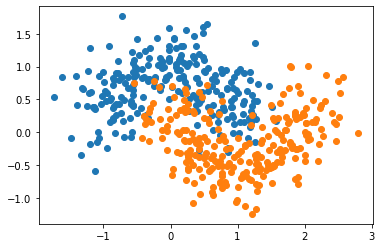

In [4]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 随机森林

In [5]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=500, random_state=666, oob_score=True, n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=666)

In [6]:
rf_clf.oob_score_

0.896

In [7]:
rf_clf2 = RandomForestClassifier(n_estimators=500, random_state=666, oob_score=True, n_jobs=-1, max_leaf_nodes=16)
rf_clf2.fit(X, y)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=666)

In [8]:
rf_clf2.oob_score_

0.92

### Extra-Trees

决策树在结点的划分上，使用随机的特征和随机的阈值

提供额外的随机性，抑制过拟合（降低了方差），但是增大了bias（偏差）

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=666)
et_clf.fit(X,y)

ExtraTreesClassifier(bootstrap=True, n_estimators=500, oob_score=True,
                     random_state=666)

In [10]:
et_clf.oob_score_

0.892

## 集成学习的回归问题

In [11]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# 06 Boosting

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

## Ada Boosting

记录预测成功结果的权值，并将成功的权值降低，偏离的权值增大，反复学习

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=500)

In [16]:
ada_clf.score(X_test, y_test)

0.832

## Gradient Boosting

针对错误训练新的模型，叠加（加和）

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=30)

In [19]:
gb_clf.score(X_test, y_test)

0.848

# 07 Stacking
模型的结果作为输入建立一个新的blending(混合)层

<center>
    <img src="./picture/stacking1.jpg"  width=50% height=50% >
</center>
<center><br>双层Stacking</br></center>

<center>
    <img src="./picture/stacking2.jpg"  width=50% height=50% >
</center>
<center><br>三层Stacking</br></center>

数据集分成三份

层数和每一层的数据数都是超参数

Stacking 容易过拟合

多层结构与神经网络相似，对于神经网络而言，每一个神经元不是一个新的算法而是计算一个函数的值，层数增多可看作深度神经网络模型，同时其也会引发更多的问题


# 08 局限
- 机器学习算法方面
    -  贝叶斯算法
    -  神经网络
- 数据预处理